Problem Statement: Group customers as per their the Annual Income and Spending Score 

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('Mall_Customers.csv')

In [3]:
# Here there is no label provided 
# work on Annual Income (k$) and Spending Score (1-100)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
#check for null value 
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt

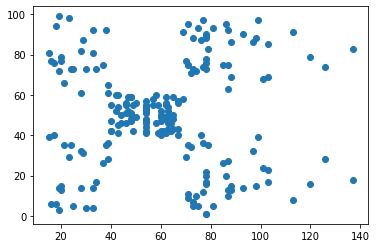

In [9]:
#Do EDA 
#from data points we can say there will be 5 clusters 
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])

In [10]:
X=df[['Annual Income (k$)','Spending Score (1-100)','Age']].values


In [11]:
from sklearn.cluster import KMeans

In [12]:
#SELECT CULTSER SIZE AS 5 ; Default is 8 ; check with signature Shift + tab

model=KMeans(n_clusters=5,random_state=0)

In [13]:
model.fit(X)

KMeans(n_clusters=5, random_state=0)

In [14]:
y=model.predict(X)

In [15]:
#check clusters as ouputput ; It is showing cluser numbers ; cluster numbers starts from 0 ie 0 to 4 
y

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [16]:
#check number of values or data points  in each cluster 
#output shows at 0th cluster there are 35 data points, at 1st cluster 81 and so on 
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4]), array([23, 39, 79, 36, 23], dtype=int64))

In [17]:
np.sum([35, 81, 39, 22, 23])
#df.shape

200

In [18]:
df.shape

(200, 5)

In [19]:
#check for first cluster how many from 0th columns ie Annual Income (k$) 
X[y==0,0]

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39, 39], dtype=int64)

In [20]:
#check how many from 1st columns ie Spending Score (1-100) 
X[y==0,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28], dtype=int64)

In [21]:
#check for 4th cluser how many from 0th columns ie Annual Income (k$) 
X[y==3,0]

array([ 70,  71,  71,  72,  73,  73,  74,  75,  77,  77,  78,  78,  78,
        78,  78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,
        97,  98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [22]:
#check for 4th cluser how many from 0th columns ie Spending Score (1-100)
X[y==3,1]

array([29, 11,  9, 34,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,
        5, 26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16,
       28, 18], dtype=int64)

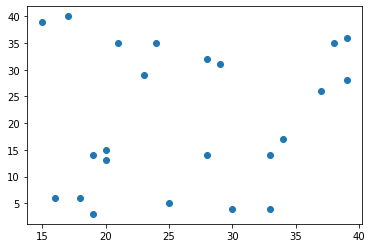

In [23]:
#show data points of 1st cluster with Annual Income (k$) and Spending Score (1-100)
plt.scatter(X[y==0,0],X[y==0,1])

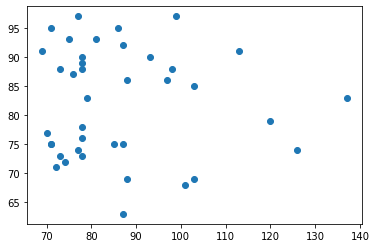

In [24]:
#show data points of 2nd  cluster with Annual Income (k$) and Spending Score (1-100)
plt.scatter(X[y==1,0],X[y==1,1])

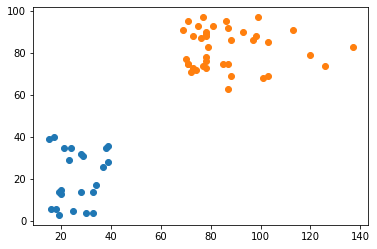

In [25]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

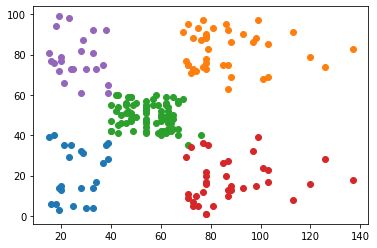

In [26]:
#show clusters combine
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])

In [27]:
# assignment change the value of cluters to 6 ie model=KMeans(n_clusters=6,random_state=0)

In [28]:
#show cluster centers or centroid for Annual Income (k$) and Spending Score (1-100)
model.cluster_centers_

array([[26.30434783, 20.91304348, 45.2173913 ],
       [86.53846154, 82.12820513, 32.69230769],
       [55.29113924, 49.56962025, 43.08860759],
       [87.75      , 17.58333333, 40.66666667],
       [26.30434783, 78.56521739, 25.52173913]])

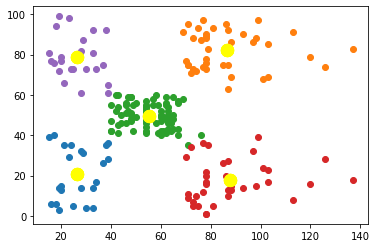

In [29]:
#show clusters combine ; s is usied for size ;s=150
for i in range(5):
    plt.scatter(X[y==i,0],X[y==i,1])
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=150,color='yellow')

In [30]:
#sklearn.metrics.silhouette_score  as metic 
#-	silhouette score is between -1 to 1
# if silhouette score  is near to the -1 mean sprawling(spreading out over a large area in an untidy or irregular way),overlapped clusters and 
# if silhouette score  is near 1 means Tight ,well-separated clusters 

from sklearn.metrics import silhouette_score 
silhouette_score(X,y)

0.44428597560893024

In [31]:
#Elow mwthod 
#sum of squared errors SSE is calculated for every number and it is stored at parameter called inertia
#inertia = Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
#-if we are getting less number for intertia then we will select that number of clusters  
model.inertia_

75350.77917248776

In [32]:
#how many clusters we can make 
len(df)
np.sqrt(200)

14.142135623730951

In [33]:
#np.sqrt(200)

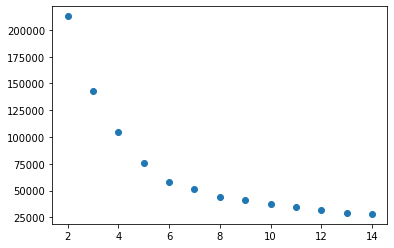

In [34]:
#Elbow method 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)

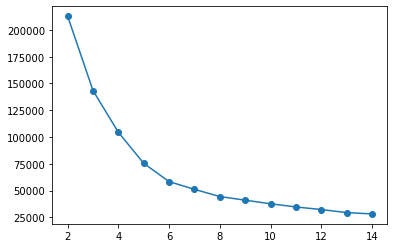

In [35]:
#graph with connecting points 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
plt.scatter(k,sse)
plt.plot(k,sse)

In [36]:
# in above output graph at 5 location graph is decreasing so elbow or bend  is at 5 
# so we will select 5 number of clusers as optimum clusters 

2Cluster,Score0.293166070535953
3Cluster,Score0.3839349967742105
4Cluster,Score0.40546302077733304
5Cluster,Score0.44428597560893024
6Cluster,Score0.4523443947724053
7Cluster,Score0.4412807576186172
8Cluster,Score0.4280971079746162
9Cluster,Score0.40126260157691634
10Cluster,Score0.3790978814868016
11Cluster,Score0.3773045245801495
12Cluster,Score0.3533695974548904
13Cluster,Score0.34649030639881756
14Cluster,Score0.3485798986558785


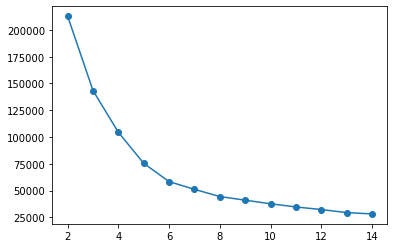

In [37]:
# show silhouette_score with cluster # from output we found that 5Cluster,Score0.553931997444648 is the maximum score 
# so we can finalize the cluster size =5 
k=range(2,15)
sse=[]
for i in k:
    demo_model=KMeans(n_clusters=i,random_state=0).fit(X)
    sse.append(demo_model.inertia_)
    y=demo_model.predict(X)
    print(f"{i}Cluster,Score{silhouette_score(X,y)}")
plt.scatter(k,sse)
plt.plot(k,sse)